# NY Taxi Fare prediction - 23/03/2021

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

## Data loading

In [28]:
ls new-york-city-taxi-fare-prediction/

GCP-Coupons-Instructions.rtf  test.csv
sample_submission.csv         train.csv


In [29]:
train_df = pd.read_csv('new-york-city-taxi-fare-prediction/train.csv',
                       nrows=100000
                      )

In [30]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [31]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [32]:
# data types
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

- floats and integer are what we expect for the concerned columns
- pickup_datetime is read as a string. We leave it that way for now.

In [33]:
# mean of the fare amount
train_df.fare_amount.mean()

11.354651700000002

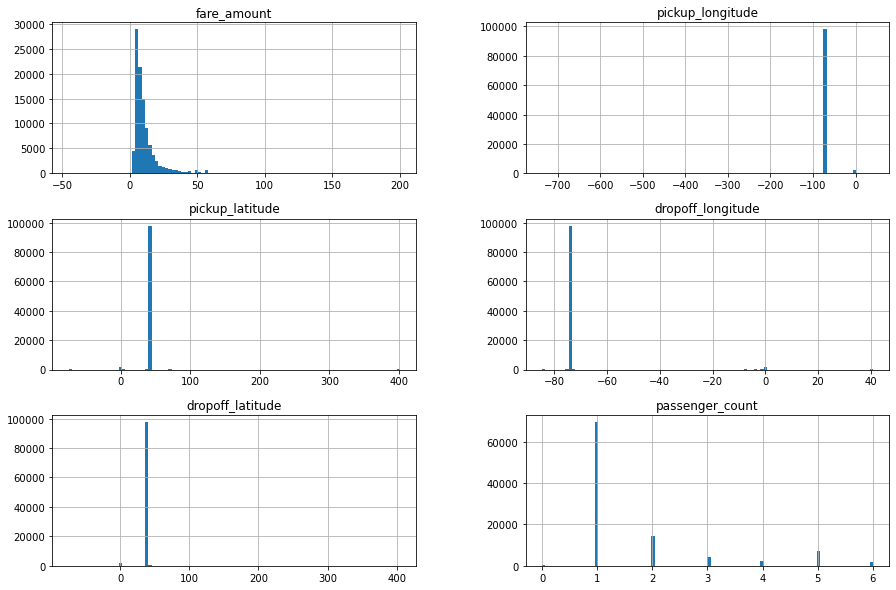

In [34]:
# make some histogram to visualize the data

train_df.hist(bins=100, figsize=(15,10));

In [35]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


The location of New York is ~ (40, -74) - this is consistent with most of the longitudes and latitudes we see in the data.

But there are some points very far from there that we need to remove.

In [36]:
longitudes_range = (-74.3, -73.7)
latitudes_range = (40.5, 40.9)

In [37]:
mask = \
(train_df['pickup_longitude'] > longitudes_range[0]) & \
(train_df['pickup_longitude'] < longitudes_range[1]) & \
(train_df['dropoff_longitude'] > longitudes_range[0]) & \
(train_df['dropoff_longitude'] < longitudes_range[1]) & \
(train_df['pickup_latitude'] > latitudes_range[0]) & \
(train_df['pickup_latitude'] < latitudes_range[1]) & \
(train_df['dropoff_latitude'] > latitudes_range[0]) & \
(train_df['dropoff_latitude'] < latitudes_range[1]) 

In [38]:
selected_df = train_df[mask]

In [39]:
selected_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


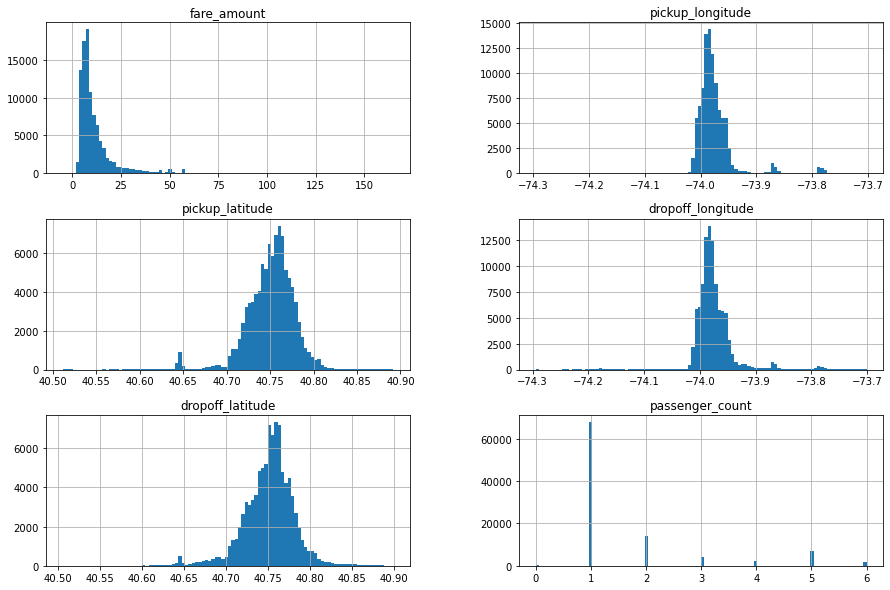

In [40]:
selected_df.hist(bins=100, figsize=(15,10));

The histograms of the dropoff and pickup positions now look ok (there is no points very far from the center)

In [41]:
selected_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97715.000000,97715.000000,97715.000000,97715.000000,97715.000000,97715.000000
mean,11.293236,-73.975473,40.750908,-73.974361,40.751290,1.674492
std,9.443599,0.034470,0.026873,0.034146,0.030672,1.300610
min,-5.000000,-74.295537,40.511087,-74.294613,40.505648,0.000000
25%,6.000000,-73.992272,40.736657,-73.991406,40.735757,1.000000
50%,8.500000,-73.982088,40.753512,-73.980451,40.753940,1.000000
75%,12.500000,-73.968358,40.767639,-73.965228,40.768434,2.000000
max,165.000000,-73.702795,40.891938,-73.701188,40.899325,6.000000


In [42]:
# remove rows that have NaN values:
selected_df = selected_df.dropna()

In [43]:
# also filter to have fares > 0 and passengers counts > 0
selected_df = selected_df[(selected_df.fare_amount>0) & (selected_df.passenger_count>0)]

In [44]:
selected_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97347.000000,97347.000000,97347.000000,97347.000000,97347.000000,97347.000000
mean,11.302455,-73.975466,40.750906,-73.974366,40.751290,1.680596
std,9.452427,0.034477,0.026869,0.034131,0.030655,1.298937
min,0.010000,-74.295537,40.511087,-74.294613,40.505648,1.000000
25%,6.000000,-73.992270,40.736661,-73.991402,40.735765,1.000000
50%,8.500000,-73.982086,40.753512,-73.980452,40.753940,1.000000
75%,12.500000,-73.968357,40.767638,-73.965233,40.768423,2.000000
max,165.000000,-73.702795,40.891938,-73.701188,40.899325,6.000000


## B. Data visualization

scatter plots

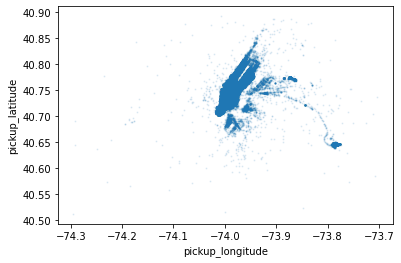

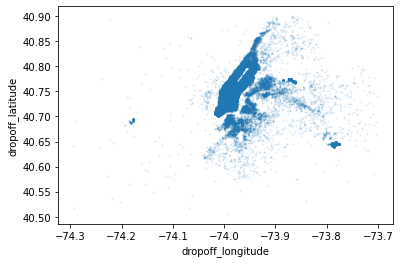

In [45]:
selected_df.plot.scatter(x = 'pickup_longitude',
                         y = 'pickup_latitude', 
                         alpha=0.1, 
                         style='.',
                         s=1
                        );

ax = selected_df.plot.scatter(x = 'dropoff_longitude', 
                              y = 'dropoff_latitude', 
                              alpha=0.1,
                              s=1
                             );

In [46]:
def display_ny_map():
    nyc_map_zoom = plt.imread('NY_taxi_fare/nyc_-74.3_-73.7_40.5_40.9.png')
    BB = (-74.3, -73.7, 40.5, 40.9)
    ax = plt.imshow(nyc_map_zoom, zorder=0, extent=BB)
    return ax.axes

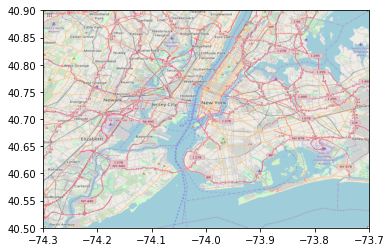

In [47]:
ax = display_ny_map()

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

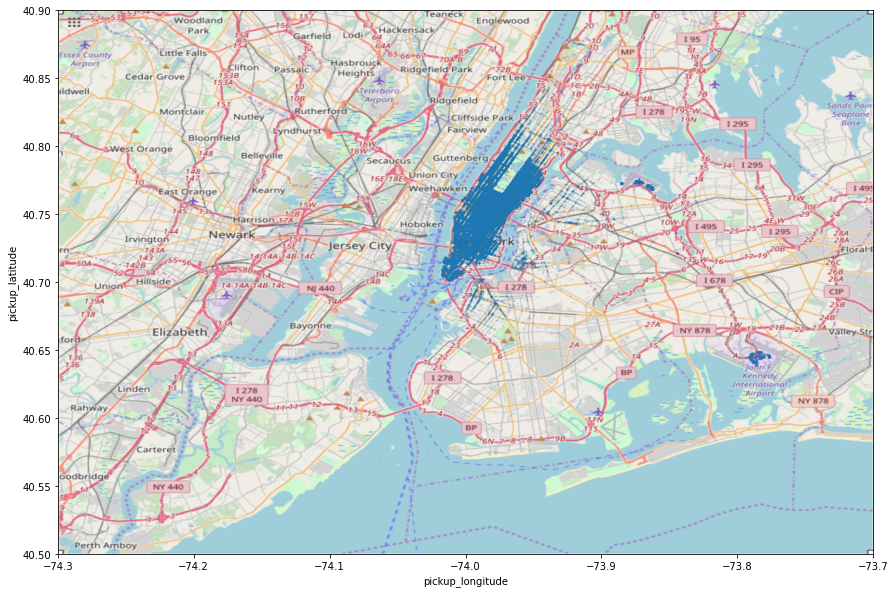

In [48]:
plt.figure(figsize=(15,10))
ax = display_ny_map()
selected_df.plot.scatter(x = 'pickup_longitude',
                         y = 'pickup_latitude', 
                         ax=ax, 
                         alpha=0.1,
                         s=1
                        )

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

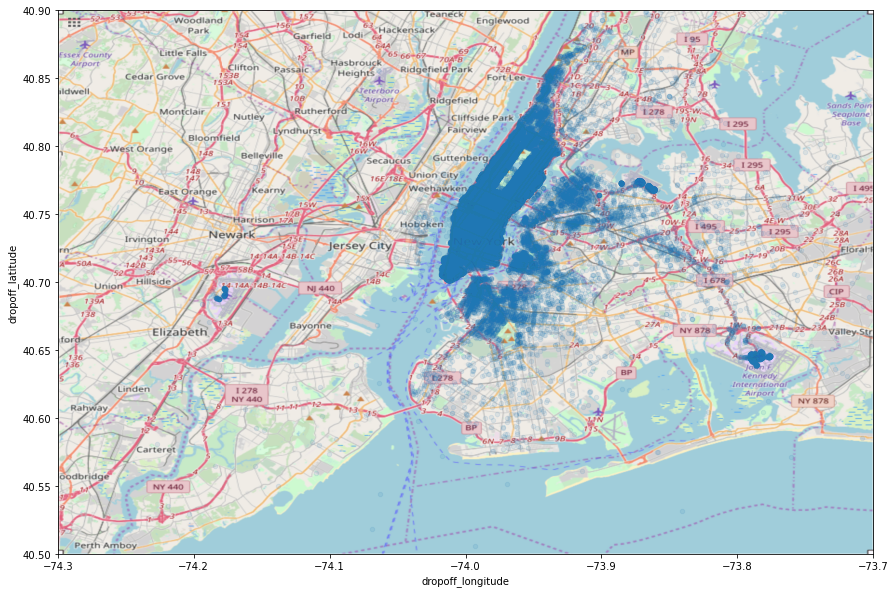

In [49]:
plt.figure(figsize=(15,10))
ax = display_ny_map()
selected_df.plot.scatter(x = 'dropoff_longitude', 
                         y = 'dropoff_latitude', 
                         ax=ax, alpha=0.1)

## C. Engineering

### Distance

In [50]:
euclidian_distance = np.sqrt((selected_df.dropoff_longitude - selected_df.pickup_longitude)**2 \
        + (selected_df.dropoff_latitude - selected_df.pickup_latitude)**2)

euclidian_distance

0        0.009436
1        0.079696
2        0.013674
3        0.025340
4        0.019470
           ...   
99995    0.017952
99996    0.016913
99997    0.004941
99998    0.010442
99999    0.017944
Length: 97347, dtype: float64

In [51]:
import numpy as np
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.deg2rad, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [52]:
distance = haversine(selected_df.pickup_longitude, 
          selected_df.pickup_latitude,
          selected_df.dropoff_longitude,
          selected_df.dropoff_latitude
         )
distance

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
99995    1.607917
99996    1.693432
99997    0.424983
99998    1.159117
99999    1.936816
Length: 97347, dtype: float64

In [53]:
selected_df['distance'] = distance

In [54]:
selected_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

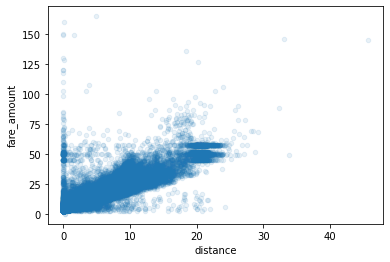

In [55]:
selected_df.plot.scatter(x='distance', y='fare_amount', alpha=0.1)

10km ride would cost around 25$ ?

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()
# y = A*X + B

In [60]:
X = selected_df.distance.values.reshape(-1, 1)
y = selected_df.fare_amount.values.reshape(-1, 1)
X

array([[1.03076394],
       [8.4501336 ],
       [1.38952523],
       ...,
       [0.42498257],
       [1.15911679],
       [1.93681564]])

In [63]:
lr.fit(X, y)

LinearRegression()

In [66]:
A = lr.coef_[0][0]
B = lr.intercept_[0]
A, B

(2.3019812380527913, 3.681347699498887)

In [67]:
x = np.linspace(0, 40, 100)

In [72]:
def linear_prediction(x):
    return A*x + B

In [73]:
f = linear_prediction(x)

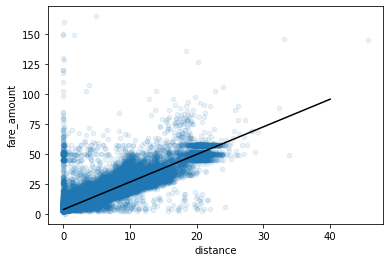

In [74]:
selected_df.plot.scatter(x='distance', y='fare_amount', alpha=0.1)
plt.plot(x, f, color='black')

In [79]:
linear_prediction(0)

3.681347699498887

In [80]:
from sklearn.ensemble import RandomForestRegressor